In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

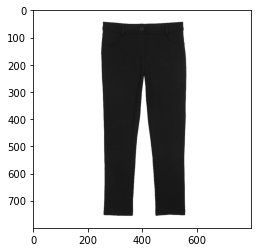

In [2]:
DATADIR="D:\Hi-tech Work\Image classification\Classes\classes2"
CATEGORIES=["Bottom Wear","Top Wear"]
for cat in CATEGORIES:
    path=os.path.join(DATADIR,cat)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break


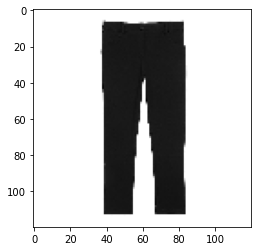

In [3]:
img_size=120

new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array,cmap='gray')
plt.show()


In [4]:
training_data=[]
def create_train_data():
    for cat in CATEGORIES:
        path=os.path.join(DATADIR,cat)
        class_num=CATEGORIES.index(cat)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

create_train_data()

In [5]:
print(len(training_data))

928


In [6]:
import random
random.shuffle(training_data)


In [7]:
for sample in training_data[:10]:
    print(sample[1])                # sample[1] is the label and sample[0] would be the img itself

0
1
1
1
1
0
1
0
1
0


In [8]:
x=[]
y=[]
# 0 = Bottom Wear
# 1 = Top Wear

In [9]:
for features,labels in training_data:
    x.append(features)
    y.append(labels)

x=np.array(x).reshape(-1,img_size,img_size,1)   # last 1 is added because it is grayscale


In [10]:
# import pickle
# pickle_out=open('x.pickle','wb')
# pickle.dump(x,pickle_out)
# pickle_out.close()

# pickle_out=open('y.pickle','wb')
# pickle.dump(y,pickle_out)
# pickle_out.close()

In [11]:
# pickle_in=open(r'D:\Hi-tech Work\Image classification\Classes\x.pickle','rb')
# x=pickle.load(pickle_in)

# pickle_in_y=open('D:\Hi-tech Work\Image classification\Classes\y.pickle','rb')
# y=pickle.load(pickle_in_y)

In [12]:
# Another way to read a pickle file

# import pandas as pd

# x = pd.read_pickle(r'D:\Hi-tech Work\Image classification\Classes\x.pickle')
# y = pd.read_pickle(r'D:\Hi-tech Work\Image classification\Classes\y.pickle')

In [ ]:
# We are using CNN.
# The basic CNN structure is as follows: Convolution -> Pooling -> Convolution -> Pooling -> Fully Connected Layer -> Output
'''
Convolution is the act of taking the original data, and creating feature maps from it.
Pooling is down-sampling, most often in the form of "max-pooling," where we select a region, 
and then take the maximum value in that region, and that becomes the new value for the entire region. 
Fully Connected Layers are typical neural networks,where all nodes are "fully connected." 
The convolutional layers are not fully connected like a traditional neural network.

'''

In [ ]:
""" 
First we start off by taking a picture and then we convert it into pixels.
Then we will take each window and will find features within that window.

That window's features are now just a single pixel-sized feature in a new featuremap, 
but we will have multiple layers of featuremaps in reality.

Basically slowly exxtracting values from the image
"""

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D
import numpy as np
#x = np.array(x)
y = np.array(y)

x = x/255.0         # Normalizing the data

model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=x.shape[1:]))
model.add(Activation('relu')) # Rectified Linear unit: piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimize~r='adam',~
              metrics=['accuracy'])

model.fit(x, y, epochs=3,batch_size=32, validation_split=0.2)

Epoch 1/3
24/24 [==============================] - 12s 480ms/step - loss: 0.8016 - accuracy: 0.7237 - val_loss: 0.2586 - val_accuracy: 0.9301
Epoch 2/3
24/24 [==============================] - 11s 472ms/step - loss: 0.2645 - accuracy: 0.8922 - val_loss: 0.1218 - val_accuracy: 0.9624
Epoch 3/3
24/24 [==============================] - 11s 470ms/step - loss: 0.1753 - accuracy: 0.9407 - val_loss: 0.1260 - val_accuracy: 0.9624
